In [2]:
import cv2, sys
import numpy as np

import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('../ch_1/figure/fig/cat.bmp')
img_resize = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.imshow('image_re', img_resize)

while True:
    key = cv2.waitKey()
    
    if key == 27 or key == ord('q'):
        break
        
cv2.destroyAllWindows()

In [2]:
import glob

In [3]:
img_lista = glob.glob('../ch_1/figure/images/*.*')
# print(img_lista)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_lista[idx])
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1
    
    if idx >= len(img_lista):
        idx = 0
        
cv2.destroyAllWindows()

In [6]:
src = cv2.imread('../ch_1/figure/fig/airplane.bmp')
mask = cv2.imread('../ch_1/figure/fig/mask_plane.bmp', 0)
dst = cv2.imread('../ch_1/figure/fig/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

dst1 = cv2.copyTo(src, mask)
    
cv2.copyTo(src, mask, dst)
    
cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
img = np.full((600, 1200, 3), (255, 255, 255), np.uint8)

cv2.line(img, (50, 50), (300, 50), (0, 0,255), 4, cv2.LINE_8)
cv2.arrowedLine(img, (300, 50), (300, 300), (0, 0,255), 4, cv2.LINE_8)

cv2.rectangle(img, (50, 400), (200, 500), (0, 0,255), 4, cv2.LINE_8)
cv2.rectangle(img, (50, 400, 100, 100), (0, 0,255), -1, cv2.LINE_8)

cv2.circle(img, (300, 300), 100, (255, 0, 0), 3, cv2.LINE_AA)

cv2.putText(img, 'Opnecv', (400, 500), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 0.8, (0, 0, 0), 1, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output_blur.avi', fourcc, fps, (w, h))
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('video read failed')
        break
        
    blur = cv2.GaussianBlur(frame, (0, 0), 3)
    edge = cv2.Canny(frame, 50, 150)
    out.write(blur)
        
    cv2.imshow('image', frame)
    cv2.imshow('edge', edge)
    cv2.imshow('blur', blur)
    
    keycode = cv2.waitKey(30)
    
    if keycode == 27:
        break
        
    elif keycode == ord('i'):
        inv = 255 - edge
    
    elif keycode == ord('s'):
        cv2.imwrite('my_photo.png', blur)
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [22]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down : ', x, y)
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.imshow('image', img)
            
            oldx, oldy = x, y
        

img = np.ones((500, 700, 3), np.uint8)*255

cv2.namedWindow('image')

cv2.setMouseCallback('image', call_mouse, img)
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

left button down :  120 127
left button down :  111 233
left button down :  233 280
left button down :  363 310
left button down :  110 287
left button down :  487 327
left button down :  452 380
left button down :  472 378


In [1]:
def call_track(pos):
    print(pos)
    img[:] = np.round(img1*(pos/255), 0)
    cv2.imshow('image', img)
    

img = cv2.imread('../ch_1/figure/fig/puppy.bmp', cv2.IMREAD_GRAYSCALE)

img1 = img.copy()

cv2.imshow('image', img)

cv2.createTrackbar('level', 'image', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [5]:
src1 = cv2.imread('../Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
img = cv2.imread('../Ch_3_Basic_img_proc/fig/flowers.jpg', 1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('img', img)

b, g, r = cv2.split(img)
h, s, v = cv2.split(img_hsv)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

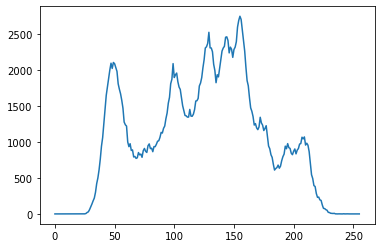

In [13]:
src = cv2.imread('../Ch_3_Basic_img_proc/fig/lenna.bmp', 0)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

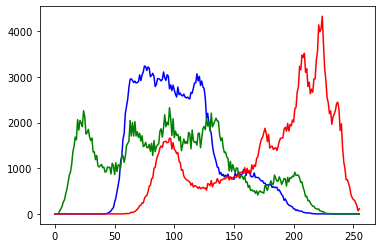

In [14]:
src = cv2.imread('../Ch_3_Basic_img_proc/fig/lenna.bmp', 1)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

cv2.imshow('src', src)

plt.plot(hist_b, c = 'b')
plt.plot(hist_g, c = 'g')
plt.plot(hist_r, c = 'r')

plt.show()

cv2.waitKey()
cv2.destroyAllWindows()